In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [66]:
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import numpy as np
from random import randint

from ipywidgets import widgets
from IPython.display import display

In [3]:
from flange.actions import *
from flange.combiners import *
from flange.conditions import *
from flange.graphs import *
from flange.locations import *
from flange.roots import *
from flange.runtime import *

%aimport flange.actions
%aimport flange.combiners
%aimport flange.conditions
%aimport flange.graphs
%aimport flange.locations
%aimport flange.roots
%aimport flange.runtime

In [121]:
import traitlets

def on_value_change(change):
    print(change['new'])

int_range = widgets.IntSlider(continuous_update=True)
int_range.observe(on_value_change, names='value')
#display(int_range)

play = widgets.Play(value=0, min=0, step=1)
play.observe(on_value_change, names="value")
#display(play)

link = widgets.jslink((play, 'value'), (int_range, 'value'))
link = traitlets.link((play, 'value'), (int_range, 'value'))
box = widgets.HBox([play, int_range])
display(box)


28
27
26
25
26
27
28
29
30
31
32


In [122]:
link.updating = True

In [20]:
g = None
src = None
prior = None

def init(b=None):
    global g, src, prior
    g = nx.barbell_graph(3, 2)
    src = flange.wrap(g)
    prior = None

def modify():
    id = len(g.nodes()) + 1
    g.add_node(id)
    
    g.add_edge(id, randint(0, len(g.nodes())))
    g.add_edge(id, randint(0, len(g.nodes())))
    
def layout():
    global prior
    global src
    g = src()
    pos=nx.spring_layout(g, iterations=10, pos=prior)
    prior = pos
    fig, ax = plt.subplots(1,1)
    nx.draw(g, pos=pos, ax=ax)
    nx.draw_networkx_labels(g, pos=pos, ax=ax)
    return fig

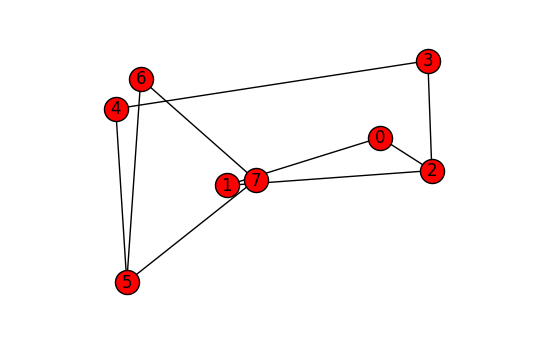

In [123]:
def redraw(b=None):
    #if randint(0, 10) > 5: modify()
    fig = layout()
    IPython.display.clear_output(wait=True)
    #display(fig)
     
        
init()
redraw()
int_range = widgets.IntSlider(continuous_update=True)
int_range.observe(redraw, names='value')        
display(int_range)

# play = widgets.Play(value=0, min=0, step=1)
# play.observe(on_value_change, names="value")

# link = widgets.jslink((play, 'value'), (int_range, 'value'))
# box = widgets.HBox([play, int_range])
# display(box)

In [120]:
modify()